In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env as e
import wrangle as w
import model as m

In [2]:
df = w.get_zillow_data()

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [5]:
df = w.clean_zillow(df)

In [6]:
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,fips_loc
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037,"Los Angeles, CA"
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037,"Los Angeles, CA"
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037,"Los Angeles, CA"
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037,"Los Angeles, CA"
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037,"Los Angeles, CA"


In [7]:
#Remove outliers
df = w.remove_outliers(df,['bedrooms','bathrooms','area','tax_value','tax_amount'])

In [8]:
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,fips_loc
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037,"Los Angeles, CA"
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037,"Los Angeles, CA"
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037,"Los Angeles, CA"
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037,"Los Angeles, CA"
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037,"Los Angeles, CA"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854286 entries, 6 to 2152863
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   area        float64
 3   tax_value   float64
 4   year_built  float64
 5   tax_amount  float64
 6   fips        int64  
 7   fips_loc    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ MB


### Split the data

In [10]:
train, validate, test = w.train_validate_test_split(df)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297953 entries, 1560492 to 1910478
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1297953 non-null  float64
 1   bathrooms   1297953 non-null  float64
 2   area        1297953 non-null  float64
 3   tax_value   1297953 non-null  float64
 4   year_built  1297953 non-null  float64
 5   tax_amount  1297953 non-null  float64
 6   fips        1297953 non-null  int64  
 7   fips_loc    1297953 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 89.1+ MB


## Categorical variable exploration

In [36]:
cat_vars = ['bedrooms', 'bathrooms', 'year_built', 'fips_loc']

bedrooms
3.0    633211
4.0    377678
2.0    224540
5.0     62524
Name: bedrooms, dtype: int64
3.0    48.785357
4.0    29.097972
2.0    17.299548
5.0     4.817124
Name: bedrooms, dtype: float64


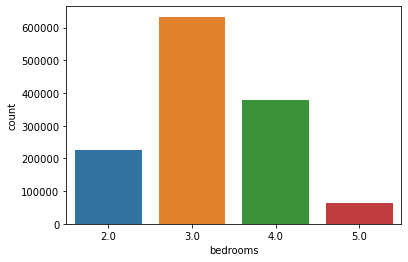

bathrooms
2.0    637039
1.0    270012
3.0    245899
2.5     92529
4.0     22364
1.5     21529
3.5      8581
Name: bathrooms, dtype: int64
2.0    49.080283
1.0    20.802910
3.0    18.945139
2.5     7.128841
4.0     1.723021
1.5     1.658689
3.5     0.661118
Name: bathrooms, dtype: float64


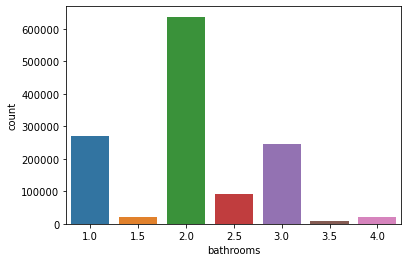

year_built
1955.0    56310
1950.0    46928
1954.0    45805
1953.0    41228
1956.0    40735
          ...  
1823.0        1
1881.0        1
1874.0        1
1812.0        1
1801.0        1
Name: year_built, Length: 151, dtype: int64
1955.0    4.338370
1950.0    3.615539
1954.0    3.529018
1953.0    3.176386
1956.0    3.138403
            ...   
1823.0    0.000077
1881.0    0.000077
1874.0    0.000077
1812.0    0.000077
1801.0    0.000077
Name: year_built, Length: 151, dtype: float64


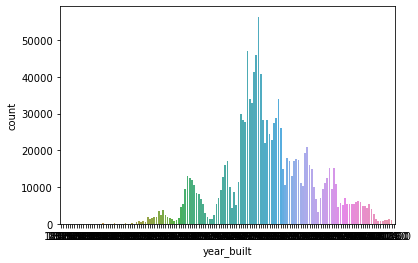

fips_loc
Los Angeles, CA    869267
Orange, CA         327402
Ventura, CA        101284
Name: fips_loc, dtype: int64
Los Angeles, CA    66.972148
Orange, CA         25.224488
Ventura, CA         7.803364
Name: fips_loc, dtype: float64


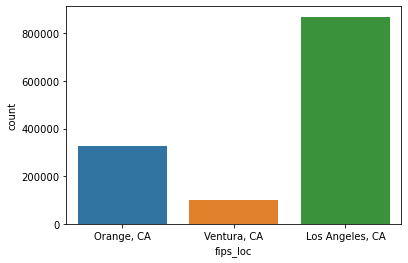

In [37]:
for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

### Bedrooms

In [12]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,fips_loc
1560492,3.0,2.0,1284.0,78502.0,1964.0,743.78,6059,"Orange, CA"
453041,4.0,2.0,1694.0,341772.0,1961.0,3609.74,6111,"Ventura, CA"
173764,4.0,3.0,1842.0,648122.0,1955.0,7796.86,6037,"Los Angeles, CA"
1649615,3.0,3.0,1922.0,219472.0,1992.0,4184.99,6037,"Los Angeles, CA"
607635,3.0,2.0,1627.0,69897.0,1925.0,959.89,6037,"Los Angeles, CA"


In [13]:
train.bedrooms.value_counts()

3.0    633211
4.0    377678
2.0    224540
5.0     62524
Name: bedrooms, dtype: int64

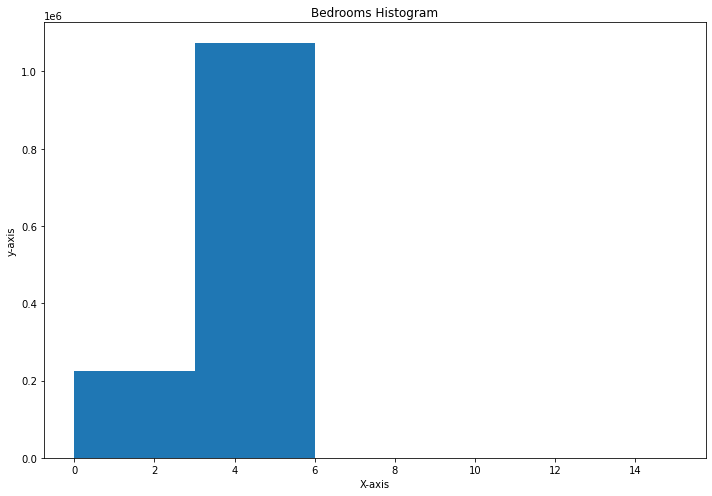

In [14]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7), tight_layout = True)
ax.hist(train.bedrooms, bins = [0, 3, 6, 9, 12, 15])
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Bedrooms Histogram')
 
# Show plot
plt.show()

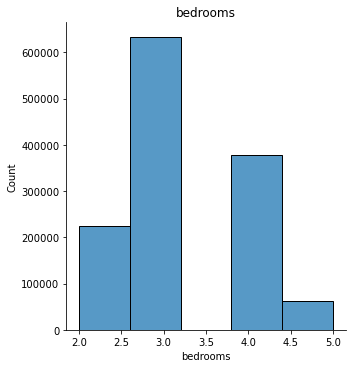

In [15]:
#Displot
sns.displot(x='bedrooms', data=train, bins=5)
plt.title('bedrooms')
plt.show()

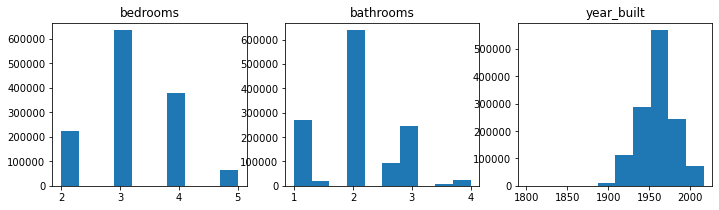

In [16]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedrooms', 'bathrooms', 'year_built']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,4,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    train[col].hist(bins=10)
    # Hide gridlines.
    plt.grid(False)

In [17]:
#Descriptive statistics
print(f'Mean bedrooms = {train.bedrooms.mean()}')
print(f'Median Bedrooms = {train.bedrooms.median()}')
print(f'Mode Bedrooms = {train.bedrooms.mode()}')
print(f'Max Bedrooms = {train.bedrooms.max()}')
print(f'Min Bedrooms = {train.bedrooms.min()}')

Mean bedrooms = 3.214326712908711
Median Bedrooms = 3.0
Mode Bedrooms = 0    3.0
Name: bedrooms, dtype: float64
Max Bedrooms = 5.0
Min Bedrooms = 2.0


### Bathrooms

In [18]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,fips_loc
1560492,3.0,2.0,1284.0,78502.0,1964.0,743.78,6059,"Orange, CA"
453041,4.0,2.0,1694.0,341772.0,1961.0,3609.74,6111,"Ventura, CA"
173764,4.0,3.0,1842.0,648122.0,1955.0,7796.86,6037,"Los Angeles, CA"
1649615,3.0,3.0,1922.0,219472.0,1992.0,4184.99,6037,"Los Angeles, CA"
607635,3.0,2.0,1627.0,69897.0,1925.0,959.89,6037,"Los Angeles, CA"


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297953 entries, 1560492 to 1910478
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1297953 non-null  float64
 1   bathrooms   1297953 non-null  float64
 2   area        1297953 non-null  float64
 3   tax_value   1297953 non-null  float64
 4   year_built  1297953 non-null  float64
 5   tax_amount  1297953 non-null  float64
 6   fips        1297953 non-null  int64  
 7   fips_loc    1297953 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 121.4+ MB


In [20]:
train.bathrooms.value_counts()

2.0    637039
1.0    270012
3.0    245899
2.5     92529
4.0     22364
1.5     21529
3.5      8581
Name: bathrooms, dtype: int64

In [21]:
#Descriptive statistics
print(f'Mean Bathrooms = {train.bathrooms.mean()}')
print(f'Median Bathrooms = {train.bathrooms.median()}')
print(f'Mode Bathrooms = {train.bathrooms.mode()}')
print(f'Max Bathrooms = {train.bathrooms.max()}')
print(f'Min Bathrooms = {train.bathrooms.min()}')

Mean Bathrooms = 2.053150229630811
Median Bathrooms = 2.0
Mode Bathrooms = 0    2.0
Name: bathrooms, dtype: float64
Max Bathrooms = 4.0
Min Bathrooms = 1.0


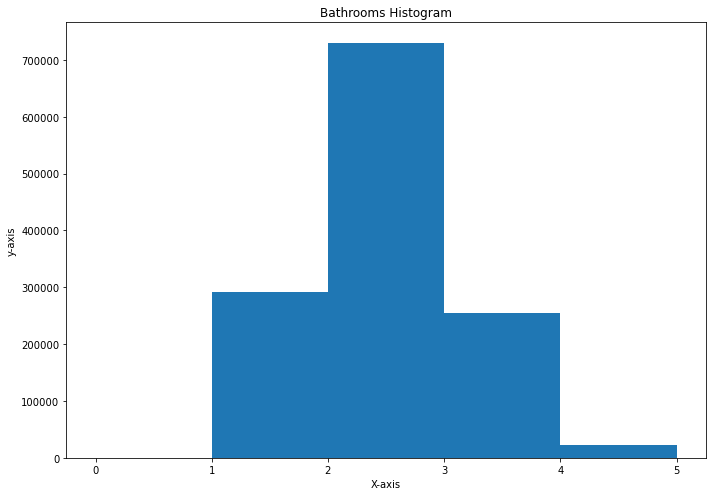

In [22]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7), tight_layout = True)
ax.hist(train.bathrooms, bins = [0, 1,2,3,4,5])
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Bathrooms Histogram')
 
# Show plot
plt.show()

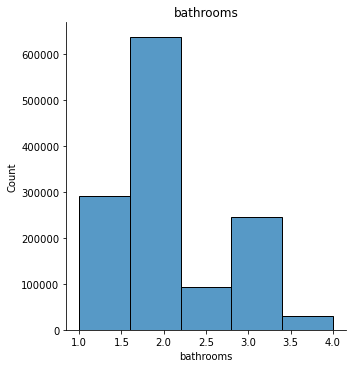

In [23]:
#Displot
sns.displot(x='bathrooms', data=train, bins=5)
plt.title('bathrooms')
plt.show()

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297953 entries, 1560492 to 1910478
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1297953 non-null  float64
 1   bathrooms   1297953 non-null  float64
 2   area        1297953 non-null  float64
 3   tax_value   1297953 non-null  float64
 4   year_built  1297953 non-null  float64
 5   tax_amount  1297953 non-null  float64
 6   fips        1297953 non-null  int64  
 7   fips_loc    1297953 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 121.4+ MB


### Year_Built

In [25]:
train.year_built.value_counts()

1955.0    56310
1950.0    46928
1954.0    45805
1953.0    41228
1956.0    40735
          ...  
1823.0        1
1881.0        1
1874.0        1
1812.0        1
1801.0        1
Name: year_built, Length: 151, dtype: int64

In [26]:
#Descriptive statistics
print(f'Mean Year Built = {train.year_built.mean()}')
print(f'Median Year Built = {train.year_built.median()}')
print(f'Mode Year Built = {train.year_built.mode()}')
print(f'Max Year Built = {train.year_built.max()}')
print(f'Min Year Built = {train.year_built.min()}')

Mean Year Built = 1959.4289562102788
Median Year Built = 1957.0
Mode Year Built = 0    1955.0
Name: year_built, dtype: float64
Max Year Built = 2016.0
Min Year Built = 1801.0


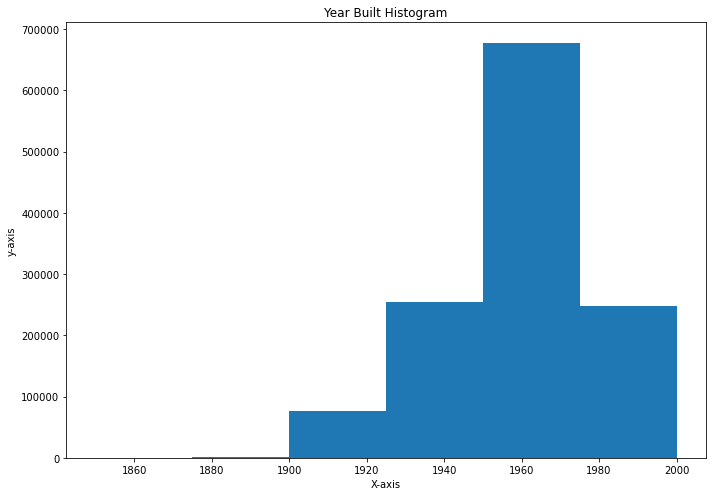

In [27]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7), tight_layout = True)
ax.hist(train.year_built, bins = [1850, 1875, 1900, 1925, 1950, 1975, 2000])
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Year Built Histogram')
 
# Show plot
plt.show()

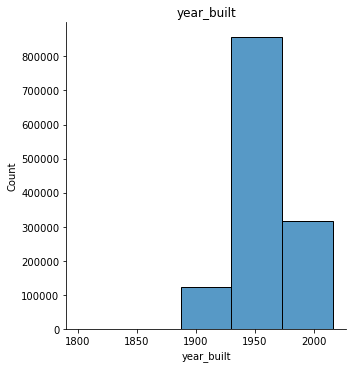

In [28]:
#Displot
sns.displot(x='year_built', data=train, bins=5)
plt.title('year_built')
plt.show()

### FIPS

In [29]:
train.fips.value_counts()

6037    869267
6059    327402
6111    101284
Name: fips, dtype: int64

In [ ]:
### FIPS--labeling fips--placed into clean file
    zillow['fips'] = zillow.fips.astype(int)
    zillow['fips_loc'] = zillow.fips.replace({6037:'Los Angeles, CA',
                       6059:'Orange, CA',
                       6111:'Ventura, CA'})

In [31]:
#Descriptive Statistics
print(f'Median FIPS = {train.fips.median()}')
print(f'Mode FIPS = {train.fips.mode()}')

Median FIPS = 6037.0
Mode FIPS = 0    6037
Name: fips, dtype: int64


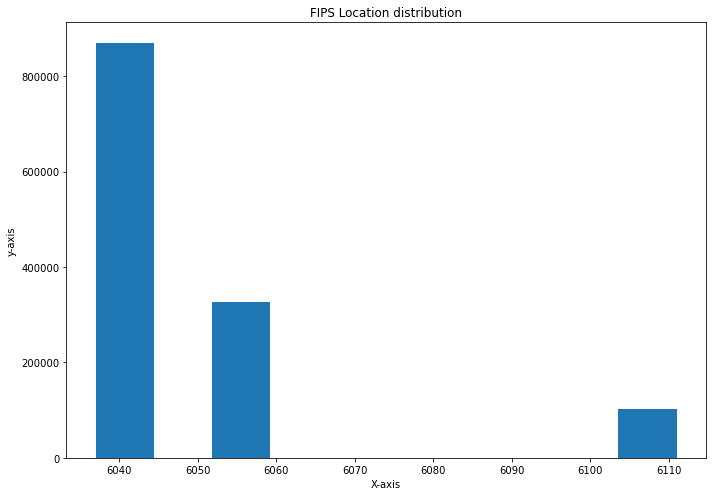

In [32]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7), tight_layout = True)
ax.hist(train.fips)
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('FIPS Location distribution')
 
# Show plot
plt.show()

## Univariate Exploration of Continuous Variables

In [34]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,fips_loc
1560492,3.0,2.0,1284.0,78502.0,1964.0,743.78,6059,"Orange, CA"
453041,4.0,2.0,1694.0,341772.0,1961.0,3609.74,6111,"Ventura, CA"
173764,4.0,3.0,1842.0,648122.0,1955.0,7796.86,6037,"Los Angeles, CA"
1649615,3.0,3.0,1922.0,219472.0,1992.0,4184.99,6037,"Los Angeles, CA"
607635,3.0,2.0,1627.0,69897.0,1925.0,959.89,6037,"Los Angeles, CA"


In [35]:
num_vars = ['area', 'tax_value', 'tax_amount']
cat_vars = ['bedrooms', 'bathrooms', 'year_built', 'fips_loc']

Mean area is: 1653.0953670895633


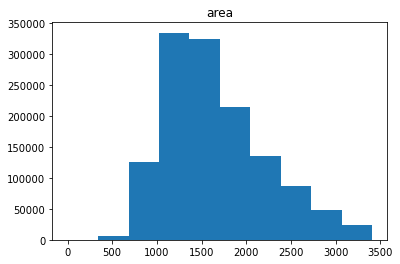

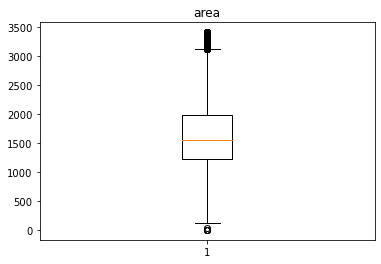

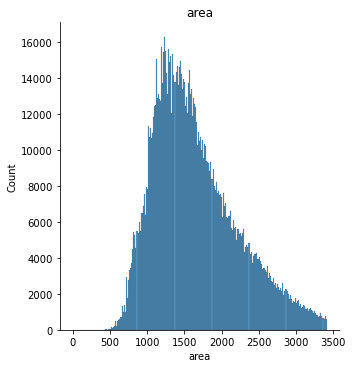

Mean tax_value is: 327806.6678038419


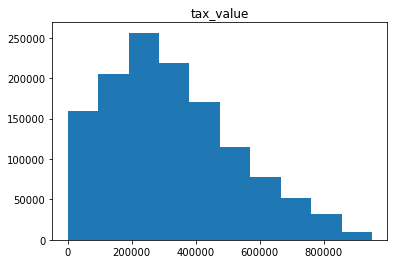

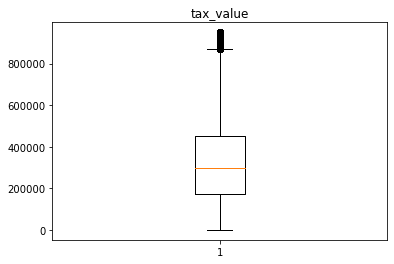

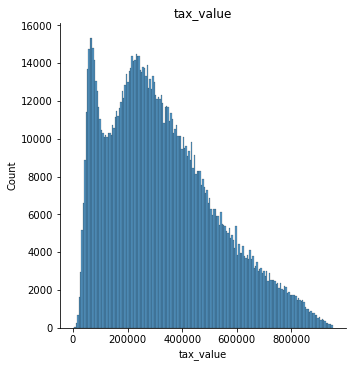

Mean tax_amount is: 4067.901726649461


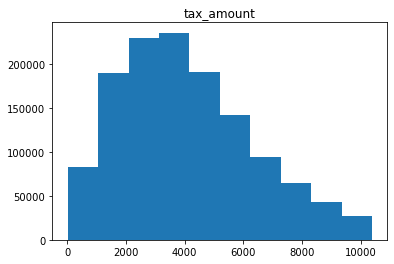

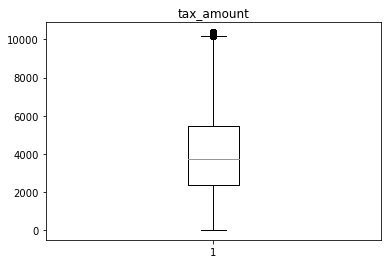

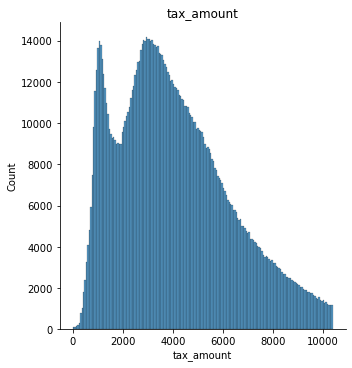

In [54]:
#Visualize other numeric data
# Plot numeric columns
for col in num_vars:
    print(f'Mean {col} is: {train[col].mean()}')
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()
    sns.displot(train[col])
    plt.title(col)
    plt.show()

### Area (Square Footage)

In [46]:
#Descriptive statistics
print(f'Mean Area = {train.area.mean()}')
print(f'Median Area = {train.area.median()}')
print(f'Mode Area = {train.area.mode()}')
print(f'Max Area = {train.area.max()}')
print(f'Min Area = {train.area.min()}')

Mean Area = 1653.0953670895633
Median Area = 1547.0
Mode Area = 0    1200.0
Name: area, dtype: float64
Max Area = 3408.0
Min Area = 1.0


### Tax Value (Price)

In [55]:
#Descriptive statistics
print(f'Mean Tax Value = {train.tax_value.mean()}')
print(f'Median Tax Value = {train.tax_value.median()}')
print(f'Mode Tax Value = {train.tax_value.mode()}')
print(f'Max Tax Value = {train.tax_value.max()}')
print(f'Min Tax Value = {train.tax_value.min()}')

Mean Tax Value = 327806.6678038419
Median Tax Value = 296465.0
Mode Tax Value = 0    450000.0
Name: tax_value, dtype: float64
Max Tax Value = 950835.0
Min Tax Value = 22.0
